In [1]:
import os 
os.chdir("/workspaces/p99-bluesky/tests/")

import asyncio
import subprocess, os
from bluesky.run_engine import RunEngine
from ophyd_async.core import DeviceCollector
from ophyd_async.epics.signal import epics_signal_r, epics_signal_rw
from ophyd_async.core.signal import observe_value, wait_for_value
from p99_bluesky.devices.p99.sample_stage import (
    FilterMotor,
    SampleAngleStage,
    p99StageSelections,
)
from p99_bluesky.plans.fast_scan import fast_scan_1d, fast_scan_grid
from p99_bluesky.plans.stxm import stxm_fast,get_velocity_and_step_size
from soft_motor import SoftThreeAxisStage
from bluesky.run_engine import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
from ophyd.sim import noisy_det as det
bec = BestEffortCallback()
RE = RunEngine({})
from databroker import Broker
db = Broker.named('temp')
from p99_bluesky.sim.sim_stages import SimThreeAxisStage
RE.subscribe(db.insert)
with DeviceCollector(mock=False):
    mock_sampleAngleStage = SampleAngleStage(
        "p99-MO-TABLE-01:", name="mock_sampleAngleStage"
    )
    mock_filter_wheel = FilterMotor(
        "p99-MO-STAGE-02:MP:SELECT", name="mock_filter_wheel"
    )
    xyz_motor = SoftThreeAxisStage("p99-MO-STAGE-02:", name="xyz_motor")


CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XLLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Thu Jul 18 2024 14:36:38.766151504
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XHLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Thu Jul 18 2024 14:36:38.766157763
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XSTOP", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Thu Jul 18 2024 14:36:38.76615972

2024-07-18 14:36:40,048 - P99 - INFO - Check xyz_motor-y limits.
2024-07-18 14:36:40,052 - P99 - INFO - Check xyz_motor-x limits.
2024-07-18 14:36:40,053 - P99 - INFO - ideal step size = 0.2782926792421032 velocity = 1.391463396210516 number of data point 249.978
2024-07-18 14:36:40,054 - P99 - INFO -  step size = 0.2782926792421032, xyz_motor-y: velocity = 1.391463396210516, number of step = 16.


Transient Scan ID: 1     Time: 2024-07-18 14:36:40
Persistent Unique Scan ID: '0bb6c82b-e6ab-49d5-9ba4-b7d32aa77e1e'
2024-07-18 14:36:40,057 - P99 - INFO - Check xyz_motor-x limits.
2024-07-18 14:36:40,058 - P99 - INFO - Check xyz_motor-y limits.
2024-07-18 14:36:40,060 - P99 - INFO - Starting 1d fly scan with xyz_motor-y: start position = -2.2, end position(2.2).
2024-07-18 14:36:41,656 - P99 - INFO - flying motor =  xyz_motor-y at speed =(1.391463396210516)
New stream: 'primary'
+-----------+------------+------------+-------------+-------------+
|   seq_num |       time |  noisy_det | xyz_

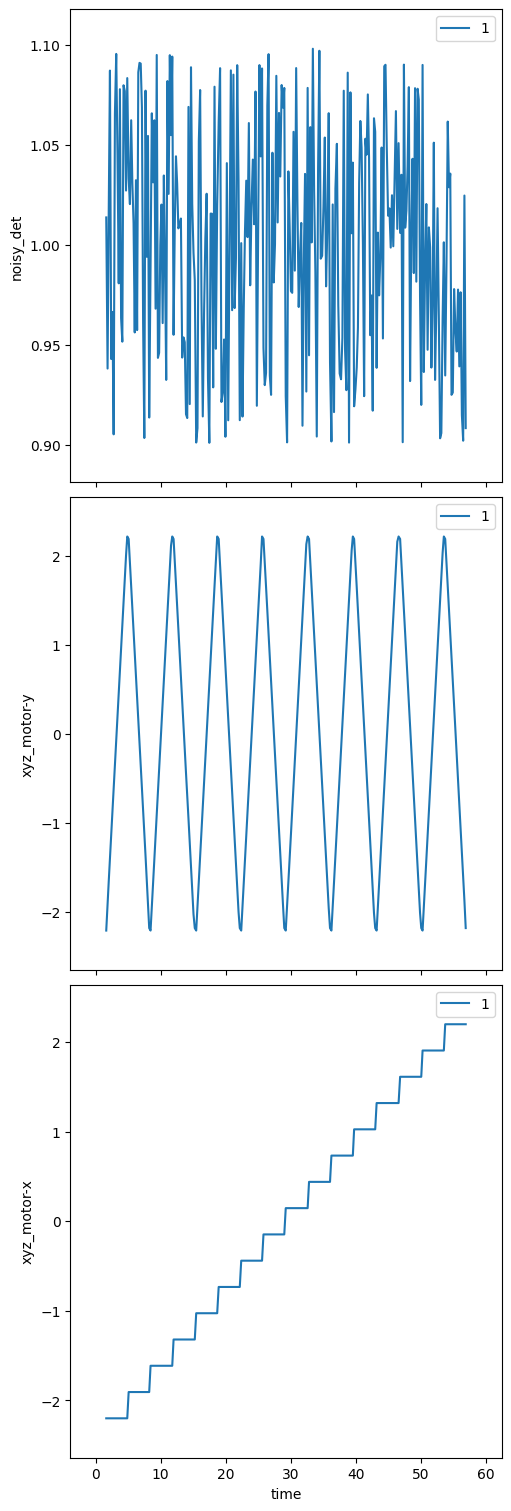

In [2]:
uid, = RE(stxm_fast(
    det=det,
    count_time = 0.2,
    step_motor = xyz_motor.x,
    step_start = -2.2,
    step_end   = 2.2,
    scan_motor = xyz_motor.y,
    scan_start = -2.2,
    scan_end   = 2.2,
    plan_time  = 50,
),bec)

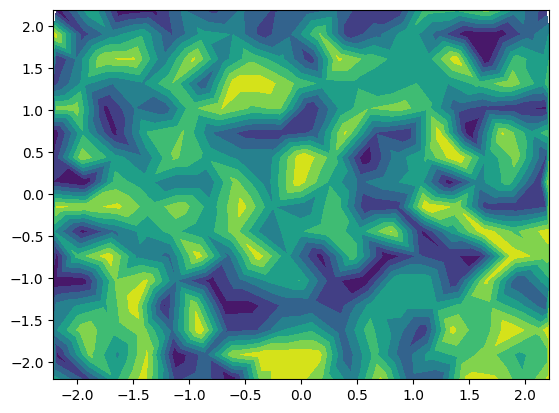

In [3]:
import matplotlib.pyplot as plt
header = db[-1]
data = header.table()
plt.tricontourf(data["xyz_motor-y"],data["xyz_motor-x"],data['noisy_det'])

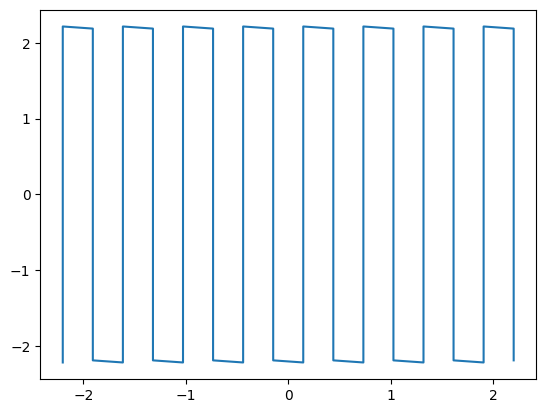

In [4]:
plt.plot(data["xyz_motor-x"],data["xyz_motor-y"])

2024-07-18 14:41:39,728 - P99 - INFO - Check xyz_motor-y limits.
2024-07-18 14:41:39,731 - P99 - INFO - Check xyz_motor-x limits.
2024-07-18 14:41:39,732 - P99 - INFO - ideal step size = 0.27829267924 velocity = 1.391463396221032 number of data point 499.956
2024-07-18 14:41:39,733 - P99 - INFO -  step size = 0.27829267924, xyz_motor-y: velocity = 1.391463396221032, number of step = 16.


Transient Scan ID: 3     Time: 2024-07-18 14:41:39
Persistent Unique Scan ID: '84fc91b2-2388-4764-b208-c4e86762de94'
2024-07-18 14:41:39,735 - P99 - INFO - Check xyz_motor-x limits.
2024-07-18 14:41:39,736 - P99 - INFO - Check xyz_motor-y limits.
2024-07-18 14:41:39,740 - P99 - INFO - Starting 1d fly scan with xyz_motor-y: start position = 2.2, end position(-2.2).
2024-07-18 14:41:39,751 - P99 - INFO - flying motor =  xyz_motor-y at speed =(1.391463396221032)
New stream: 'primary'
+-----------+------------+------------+-------------+-------------+
|   seq_num |       time |  noisy_det | xyz_motor-y | 

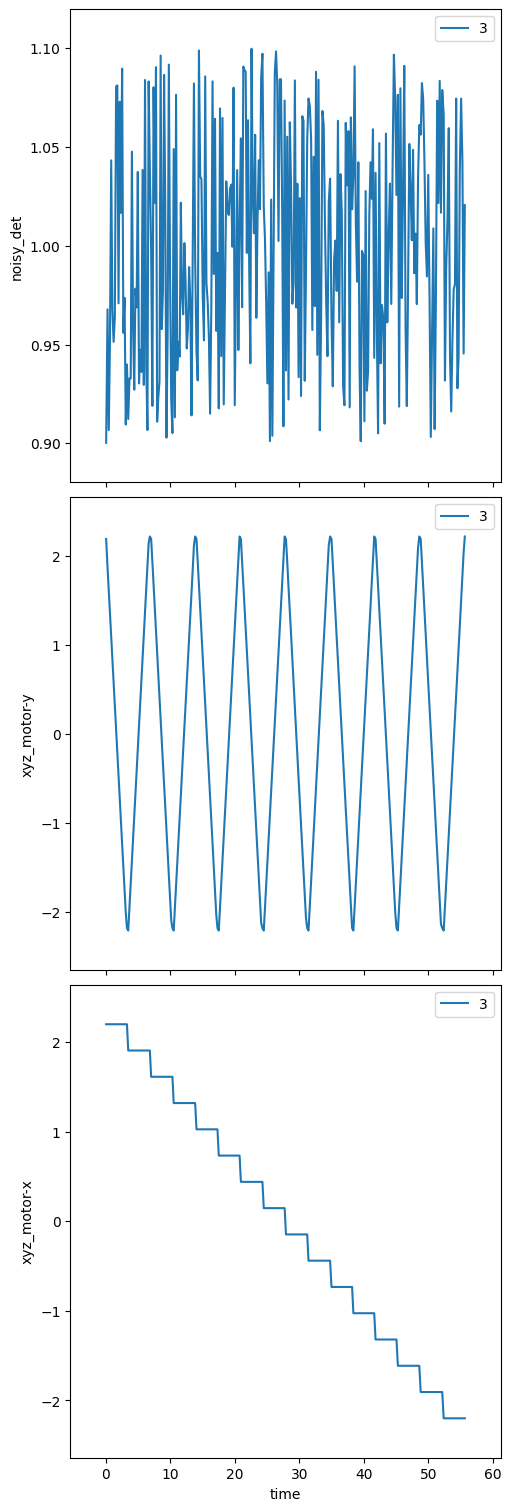

In [6]:
uid, = RE(stxm_fast(
    det=det,
    count_time = 0.1,
    step_motor = xyz_motor.x,
    step_start = 2.2,
    step_end   = -2.2,
    scan_motor = xyz_motor.y,
    scan_start = 2.2,
    scan_end   = -2.2,
    plan_time  = 50,
    step_size = -0.27829267924
),bec)

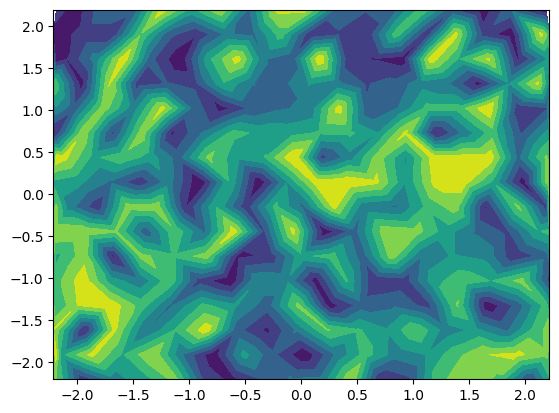

In [7]:
header = db[-1]
data = header.table()
plt.tricontourf(data["xyz_motor-y"],data["xyz_motor-x"],data['noisy_det'])


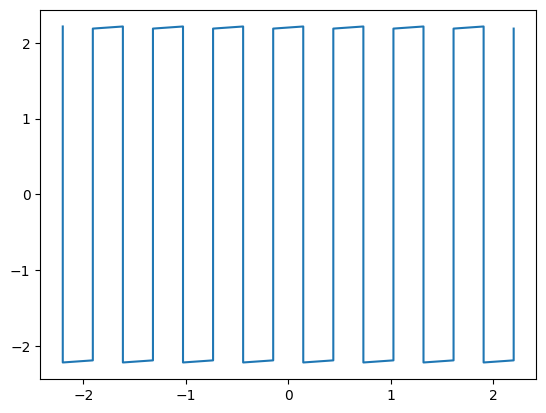

In [8]:
plt.plot(data["xyz_motor-x"],data["xyz_motor-y"])